In [ ]:
import os, yaml, sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import zscore
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import autocorr_mat, get_lagplot

In [7]:
# parameters to tweak
monkey_name = "red"
day = "0828"
npx = False
imec_n = 0
resolution_Hz = 60

# paths setting 
data_path = f"{paths['livingstone_lab']}/tiziano/data"
if npx:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_imec{imec_n}_{resolution_Hz}Hz.pkl"
else:
    neural_path = f"{data_path}/neural_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
    gaze_path = f"{data_path}/gaze_{monkey_name}_25{day}_plx_{resolution_Hz}Hz.pkl"
# end if npx:

In [8]:
# loading of the data
with open(neural_path, "rb") as f:
    data = pickle.load(f)
with open(gaze_path, "rb") as f:
    data_gaze = pickle.load(f)

In [ ]:
stimuli_names = list(data.keys())
print(len(stimuli_names), stimuli_names)

14 ['IMG_4710.mp4', 'IMG_4705.mp4', 'IMG_4712.mp4', 'IMG_4700.mp4', 'IMG_4698.mp4', 'IMG_4695.mp4', 'IMG_4697.mp4', 'IMG_4702.mp4', 'IMG_4701.mp4', 'IMG_4707.mp4', 'IMG_4694.mp4', 'IMG_4692.mp4', 'IMG_4711.mp4', 'IMG_4699.mp4']


Text(0.5, 0, 'timepoints')

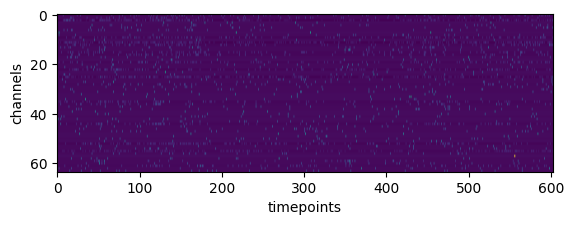

In [ ]:
plt.imshow(zscore(data[stimuli_names[0]][:,:,0], axis=1), aspect=3, cmap='viridis')
plt.ylabel("channels"); plt.xlabel("timepoints")

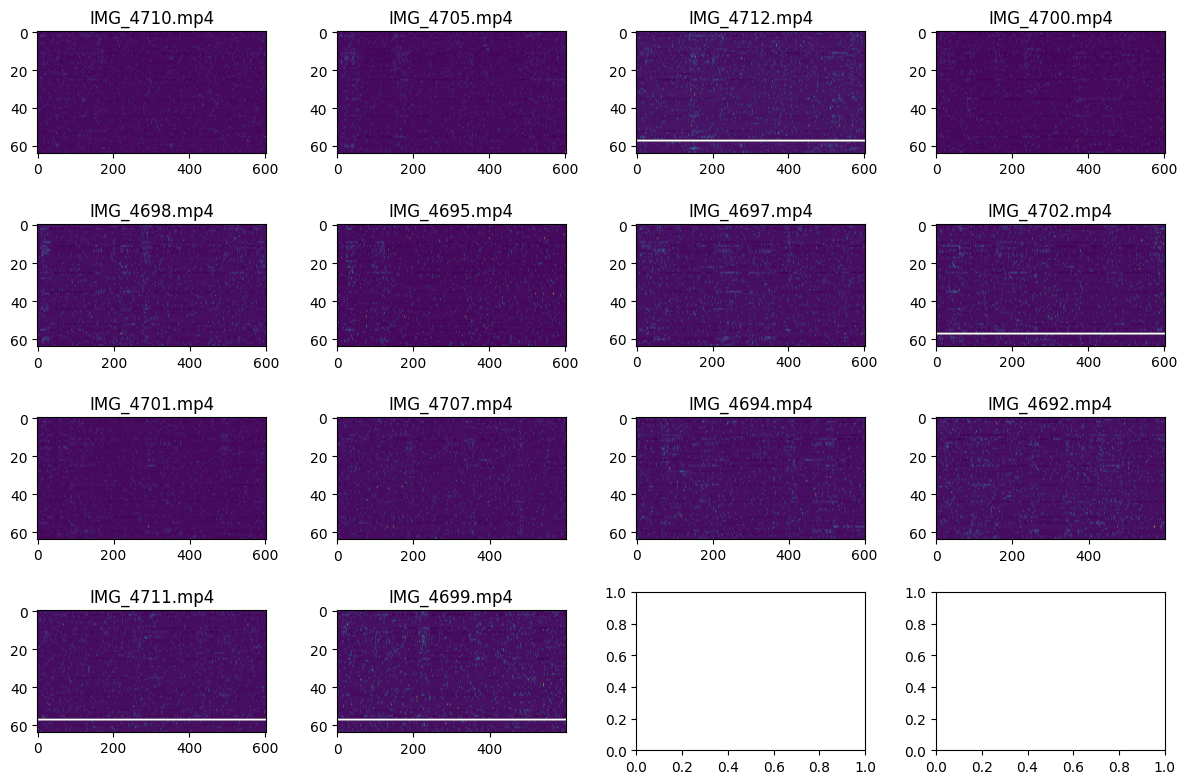

In [71]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    axes_flat[i].imshow(zscore(data[s][:,:,0], axis=1), aspect=5)
    axes_flat[i].set_title(s)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

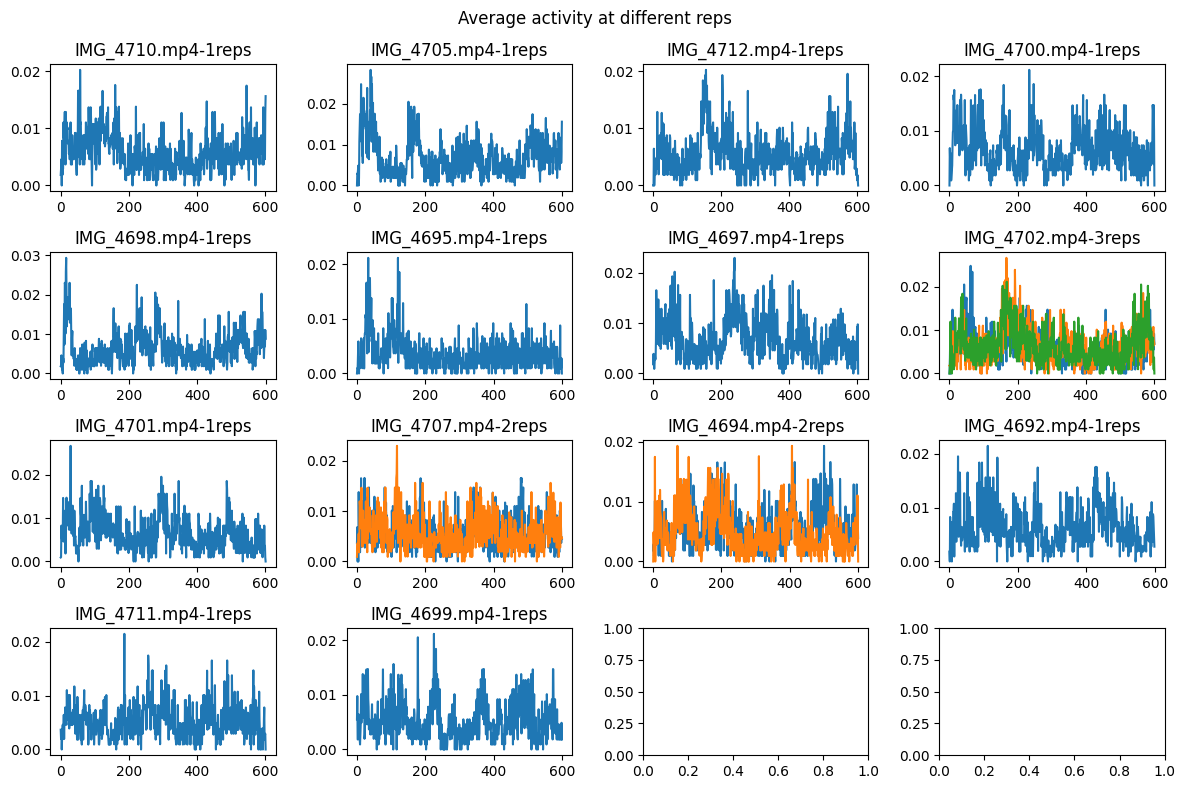

In [84]:
# plots the average data
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i, s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    axes_flat[i].plot(avg_units)
    axes_flat[i].set_title(f"{s}-{n_repetitions}reps")
plt.suptitle("Average activity at different reps")
plt.tight_layout()  # automatically adjusts spacing
plt.show()


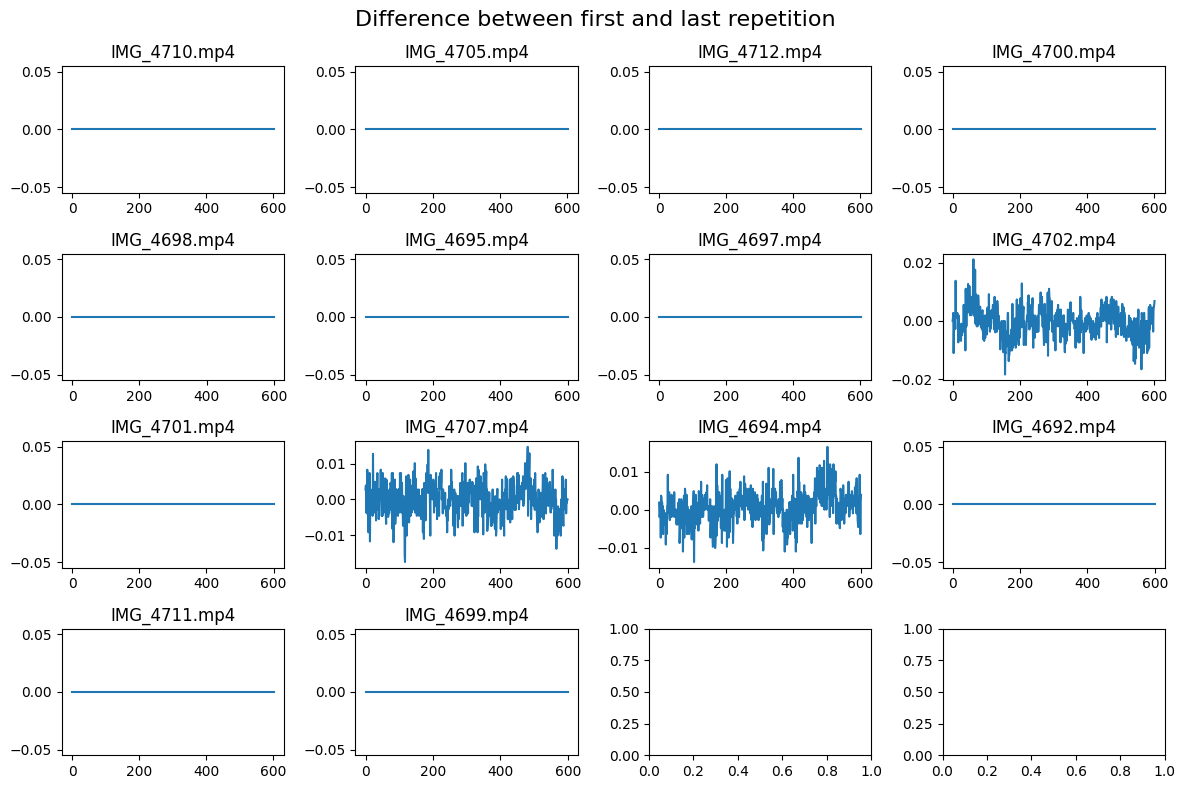

In [53]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    first_vs_last = avg_units[:,0] - avg_units[:,-1]
    axes_flat[i].plot(first_vs_last)
    axes_flat[i].set_title(s)
    counter += 1
fig.suptitle("Difference between first and last repetition", fontsize=16)
plt.tight_layout()  # automatically adjusts spacing
plt.show()

In [60]:
print("first vs last repetition correlation of the average time series")
for s in stimuli_names:
    n_repetitions = data[s].shape[2]
    avg_units = np.mean(data[s], axis=0)
    corrfirst_vs_last = np.corrcoef(avg_units[:,0], avg_units[:,-1])
    print(s, np.round(corrfirst_vs_last[0,1], 2), f"with {n_repetitions} reps")

first vs last repetition correlation of the average time series
IMG_4710.mp4 1.0 with 1 reps
IMG_4705.mp4 1.0 with 1 reps
IMG_4712.mp4 1.0 with 1 reps
IMG_4700.mp4 1.0 with 1 reps
IMG_4698.mp4 1.0 with 1 reps
IMG_4695.mp4 1.0 with 1 reps
IMG_4697.mp4 1.0 with 1 reps
IMG_4702.mp4 0.19 with 3 reps
IMG_4701.mp4 1.0 with 1 reps
IMG_4707.mp4 0.07 with 2 reps
IMG_4694.mp4 0.26 with 2 reps
IMG_4692.mp4 1.0 with 1 reps
IMG_4711.mp4 1.0 with 1 reps
IMG_4699.mp4 1.0 with 1 reps


In [85]:
mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
lp = get_lagplot(mat, max_lag=200, min_datapts=100)

16:04:49 - There are nans in corr_mat


/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


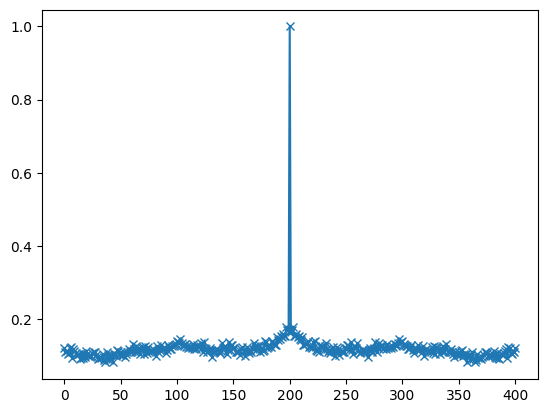

In [86]:
plt.plot(lp, marker="x")

In [51]:
# create 200-length integer array with zero at the middle (index 100)
center_zero_array = np.arange(-100, 101, dtype=int)
assert center_zero_array.size == 201 and center_zero_array[100] == 0


16:07:08 - There are nans in corr_mat
16:07:08 - There are nans in corr_mat
16:07:08 - There are nans in corr_mat
16:07:08 - There are nans in corr_mat
16:07:08 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat
16:07:09 - There are nans in corr_mat


/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


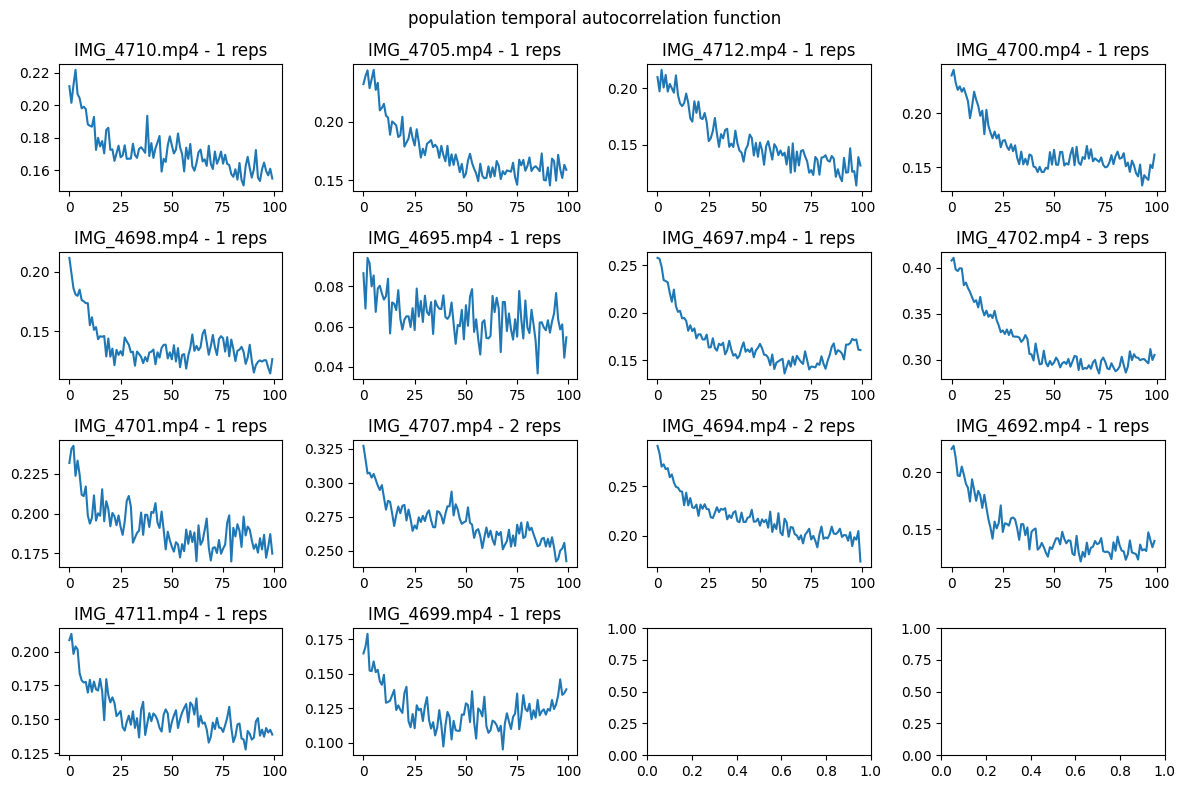

In [89]:
counter = 0
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    avg_reps = np.mean(data[s], axis=2)
    first_vs_last_mat = autocorr_mat(avg_reps)
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100, symmetric=True)
    #axes_flat[i].plot(idx_max, lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(lp_1st_vs_last[1:])
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("population temporal autocorrelation function")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

16:10:45 - There are nans in corr_mat
IMG_4710.mp4 100 1.0
16:10:45 - There are nans in corr_mat
IMG_4705.mp4 100 1.0
16:10:45 - There are nans in corr_mat
IMG_4712.mp4 100 1.0
16:10:45 - There are nans in corr_mat
IMG_4700.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4698.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4695.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4697.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4702.mp4 120 0.16056373491244452
16:10:46 - There are nans in corr_mat
IMG_4701.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4707.mp4 94 0.17687902643082276
16:10:46 - There are nans in corr_mat
IMG_4694.mp4 101 0.13022613526185775
16:10:46 - There are nans in corr_mat
IMG_4692.mp4 100 1.0
16:10:46 - There are nans in corr_mat
IMG_4711.mp4 100 1.0
16:10:46 - There are nans in corr_mat


/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/tizianocausin/Desktop/virtual_envs/temporal_context/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


IMG_4699.mp4 100 1.0


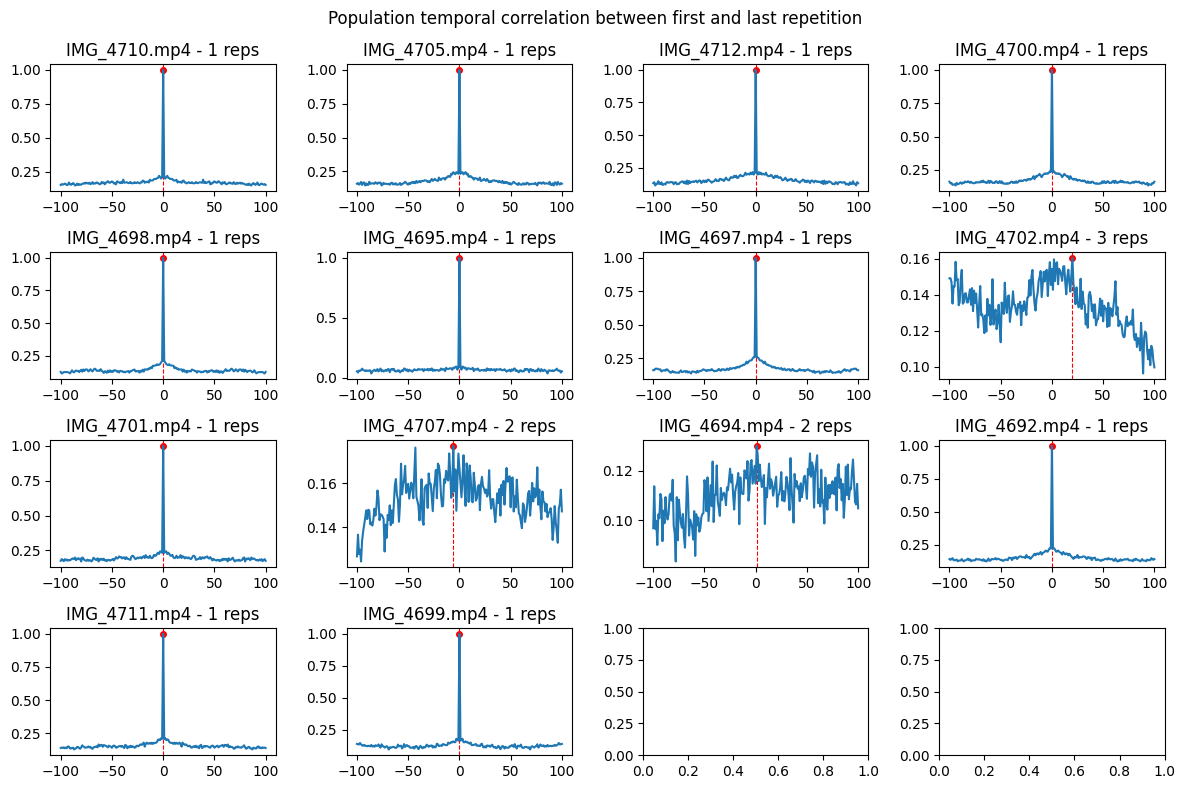

In [94]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    first_vs_last_mat = autocorr_mat(data[s][:,:,0], data2=data[s][:,:,-1])
    lp_1st_vs_last = get_lagplot(first_vs_last_mat, max_lag=100, min_datapts=100)
    idx_max = int(np.nanargmax(lp_1st_vs_last))
    print(s, idx_max, lp_1st_vs_last[idx_max])
    axes_flat[i].axvline(center_zero_array[idx_max], color='r', linestyle='--', linewidth=0.8)
    axes_flat[i].plot(center_zero_array[idx_max], lp_1st_vs_last[idx_max], 'ro', markersize=4)
    axes_flat[i].plot(center_zero_array,lp_1st_vs_last)
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("Population temporal correlation between first and last repetition")
plt.tight_layout()  # automatically adjusts spacing
plt.show()

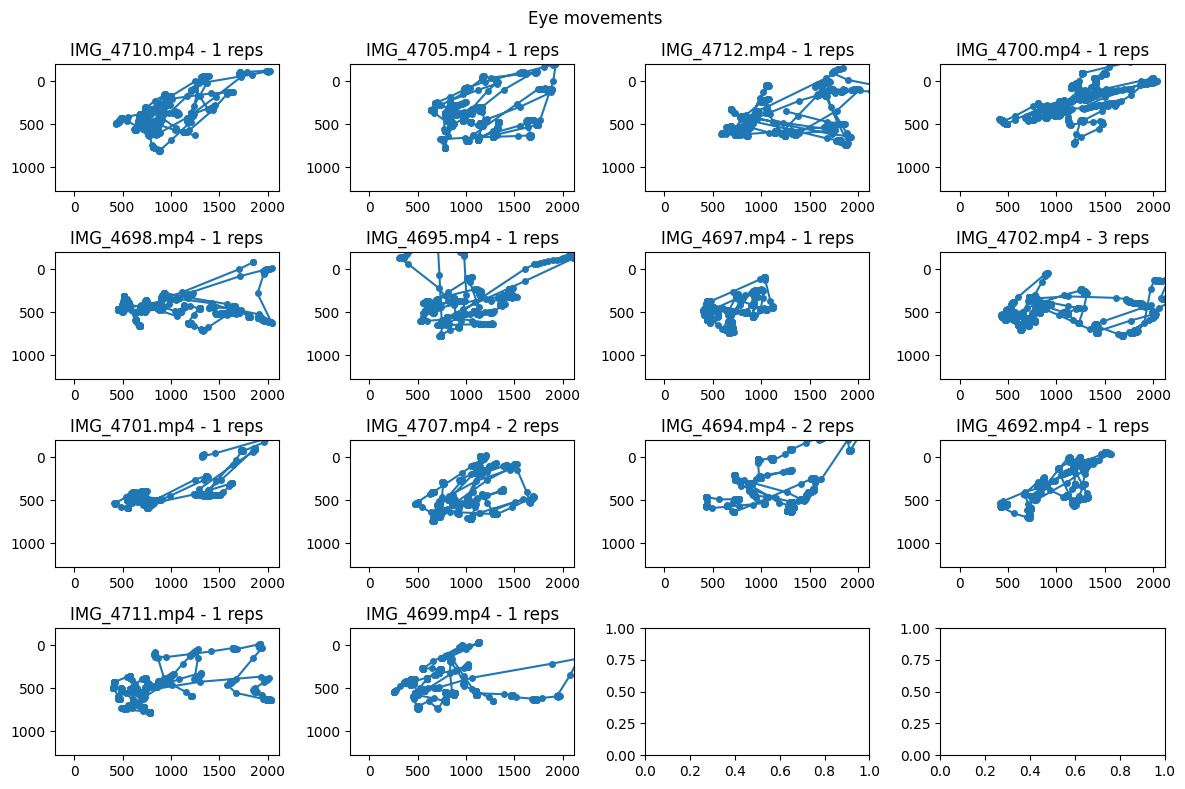

In [100]:
counter = 0
max_lag = 100
center_zero_array = np.arange(-max_lag, max_lag+1)
n_plots = len(stimuli_names)
n_cols = int(np.ceil(np.sqrt(n_plots)))
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes_flat = axes.ravel()
for i,s in enumerate(stimuli_names):
    n_repetitions = data[s].shape[2]
    axes_flat[i].plot(data_gaze[s][0,:,0], data_gaze[s][1,:,0], marker="o", markersize=4)
    axes_flat[i].set_xlim(-200, 2120)
    axes_flat[i].set_ylim(-200, 1280)
    axes_flat[i].invert_yaxis()
    axes_flat[i].set_title(f"{s} - {n_repetitions} reps")
    counter += 1
plt.suptitle("Eye movements")
plt.tight_layout()  # automatically adjusts spacing
plt.show()
